LEVEL 3:- Task 1:-

In [3]:
# Importing the warnings

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Importing the libraries which are in use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [5]:
# Load the Dataset

df1 = pd.read_csv("C:\\Users\\HP\\Downloads\\Dataset.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Task; Predictive Model

1. Build a regression model to predict the aggregate rating of a restaurant based on available features

2. split the dataset into training & testing sets& evaluate model's performance using appro metrics

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Convert categorical variables to numeric
df1 = pd.get_dummies(df1, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [10]:
# Select featues and target var

x = df1[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']]
y = df1['Aggregate rating']

In [11]:
# Split the Dataset into training and testing sets (80% training, 20% testing)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train the linear reggression model

model = LinearRegression()
model.fit(x_train, y_train)

# Predict ratings on the testing set
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model: Linear Regreesion")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Model: Linear Regreesion
Mean Squared Error (MSE): 1.6764802747031446
R-squared (R2) Score: 0.26344464090219477


2. Experiment with different algorithms (e.g.,linear regression, decision,decision trees,random forest) and compare their performance.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'decision Tree': DecisionTreeRegressor(random_state=42),
    'random Forest': RandomForestRegressor(random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results)
print(results_df)

          Linear Regression  decision Tree  random Forest
MSE                1.676480       0.203498       0.133938
R2 Score           0.263445       0.910594       0.941155


LEVEL 3: Task 2:-

1. analyze the relationship between the type of cuisine and restaurants's rating.

In [17]:
# Split cuisines into individual cuisine types
cuisines = df1['Cuisines']

In [18]:
cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [19]:
# get top 10 most common cuisines
top_10_cuisines = cuisines.value_counts().head(10).index

In [20]:
# Create a DataFrame with cuisines tyeps and corresponding ratings
cuisine_ratings = pd.DataFrame({'Cuisine': cuisines, 'Rating': df1['Aggregate rating']})

In [21]:
# Filter cuisines_ratings DataFrame to include only top 10 cuisines
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings['Cuisine'].isin(top_10_cuisines)]

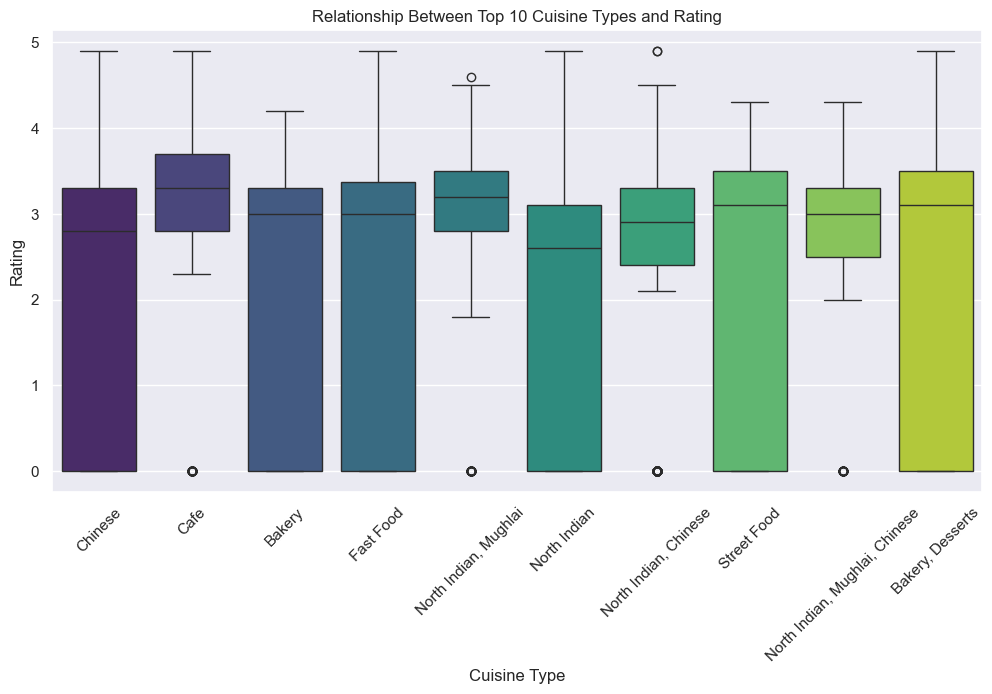

In [22]:
# Plot the relationship bet top 20 cuisines types and rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Rating', data=cuisine_ratings_top_10, palette='viridis')
plt.title('Relationship Between Top 10 Cuisine Types and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Create a dataFrame with cuisine types and corres
cuisine_votes = pd.DataFrame({'Cuisine': cuisines, 'Votes': df1['Votes']})

In [24]:
# Group by cuisine and sum votes for each cuisine
cuisine_votes_sum = cuisine_votes.groupby('Cuisine')['Votes'].sum()

# Sort cuisines 
popular_cuisines = cuisine_votes_sum.sort_values(ascending=False)


In [25]:
# Display top 10 most popular cuisines
print("Top 10 Most Popular Cuisines based on Number of Votes:")
print(popular_cuisines.head(10))

Top 10 Most Popular Cuisines based on Number of Votes:
Cuisine
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


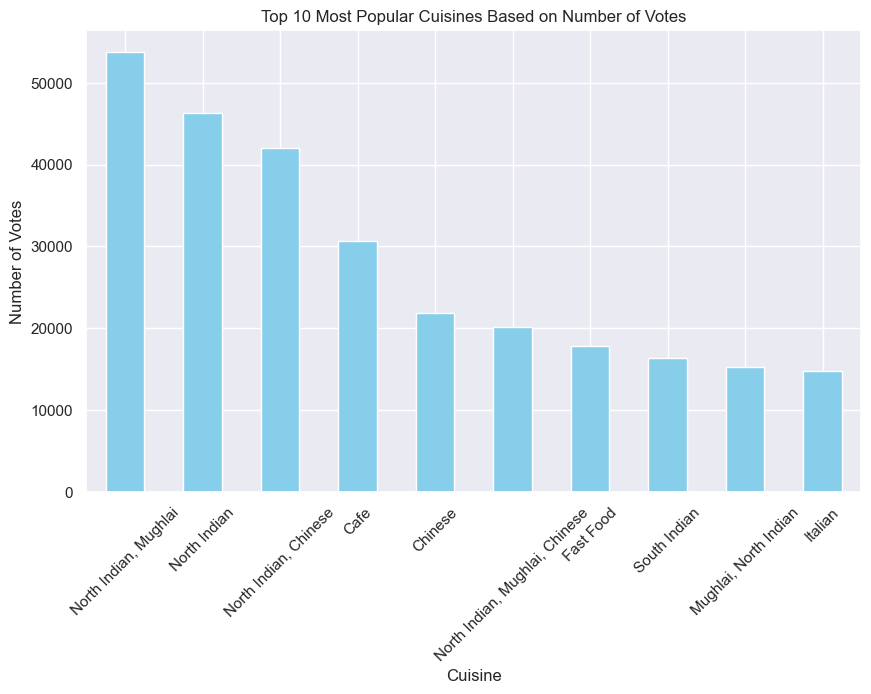

In [29]:
# Create a dataFrame with cuisine types and corres
cuisine_votes = pd.DataFrame({'Cuisine': cuisines, 'Votes': df1['Votes']})

import matplotlib.pyplot as plt

# Group by cuisine and sum votes for each cuisine
cuisine_votes_sum = cuisine_votes.groupby('Cuisine')['Votes'].sum()

# Sort cuisines 
popular_cuisines = cuisine_votes_sum.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
popular_cuisines.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()

3.Determine if there are any specific cuisines that tend to receive higher ratings.

In [50]:
# Create a DataFrame with cuisine types and corres ratings
cuisine_ratings = pd.DataFrame({'Cuisine': cuisines, 'Rating': df1['Aggregate rating']})

In [52]:
# Cal the avg rating for each cuisine
average_rating_by_cuisine = cuisine_ratings.groupby('Cuisine')['Rating'].mean()

In [54]:
# Sort cuisines based on avg rating in descending order
sorted_cuisines_by_rating = average_rating_by_cuisine.sort_values(ascending=False)

In [56]:
# Display the Top 10 cuisines with the highest avg ratings
print("Top 10 Cuisines with Highest Average Ratings:")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with Highest Average Ratings:
Cuisine
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Rating, dtype: float64


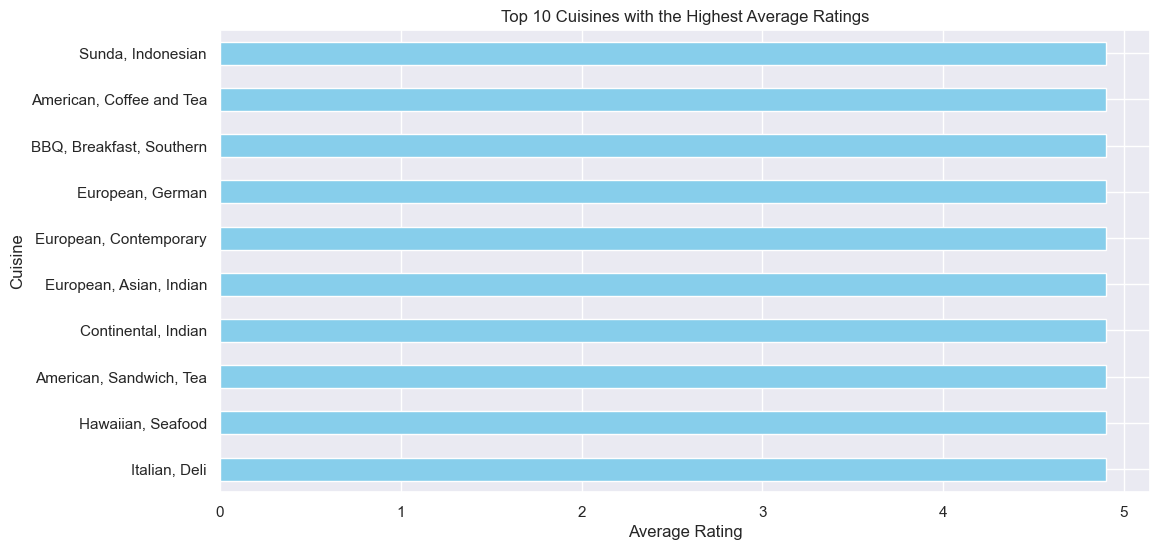

In [58]:
# Plot the graph
plt.figure(figsize=(12, 6))
sorted_cuisines_by_rating.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

LEVEL 3 - Task 3:-

Task: Data Visualization

1. Create visulalizations to represent the distribution of ratings using diff charts (histogram, barplot,etc.)

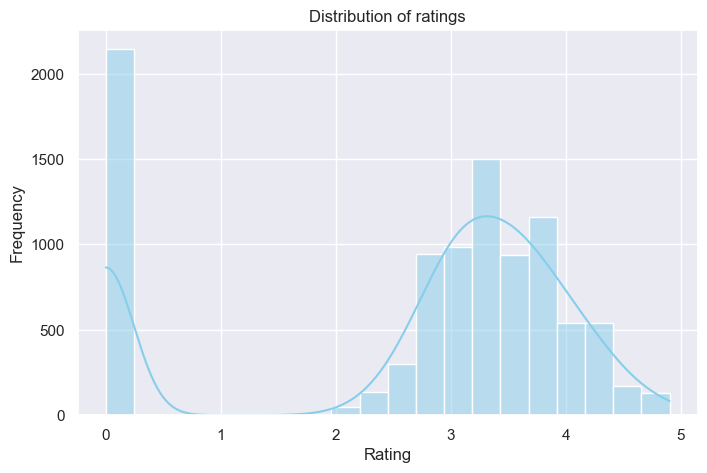

In [62]:
# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df1['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

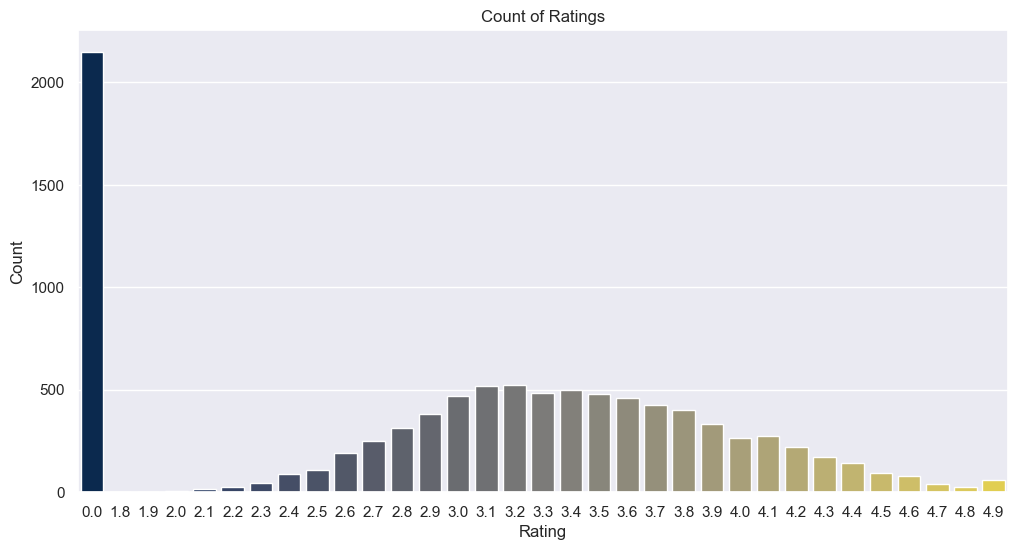

In [66]:
# Create a bar plot to visualize the count of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=df1, palette='cividis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

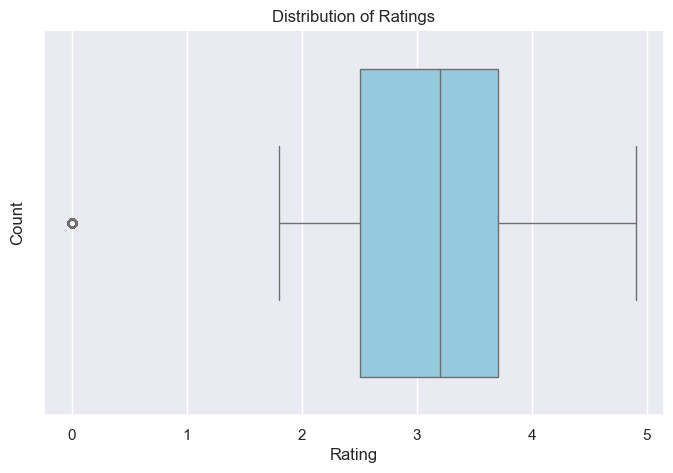

In [68]:
# Create a box plot to visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='Aggregate rating', data=df1, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

2. Compare the Avg rating of diff cuisines or cities using appro visualization 

In [70]:
# Group data by city and cal the avg rating for each city
average_rating_by_city = df1.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

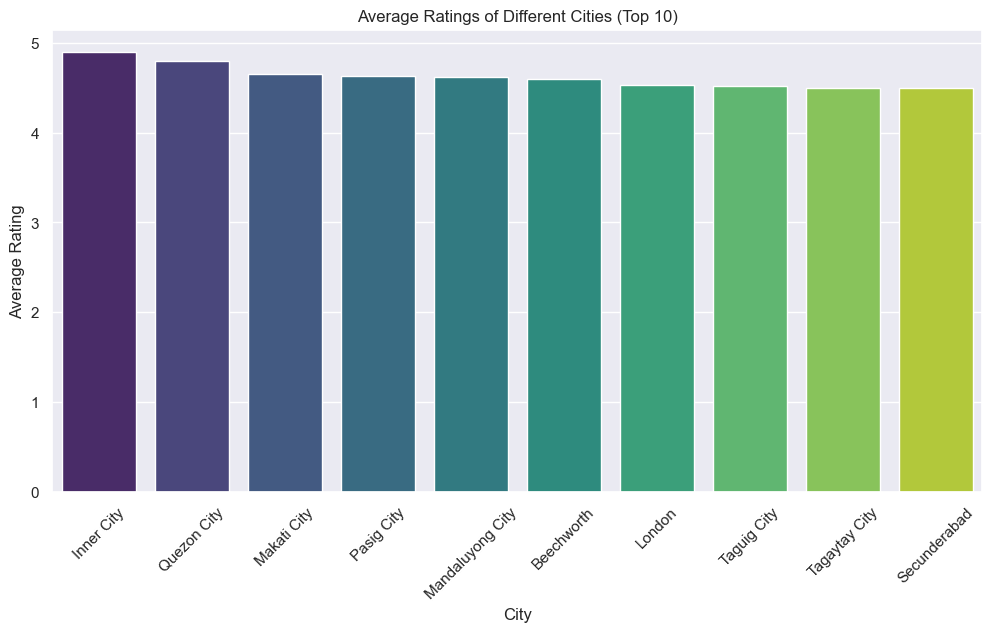

In [72]:
# Plot the avg rating of diff cities (top 10 cities)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_by_city.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')
plt.title('Average Ratings of Different Cities (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

3. Visualize the relationship between various featues and target var to gain insights.

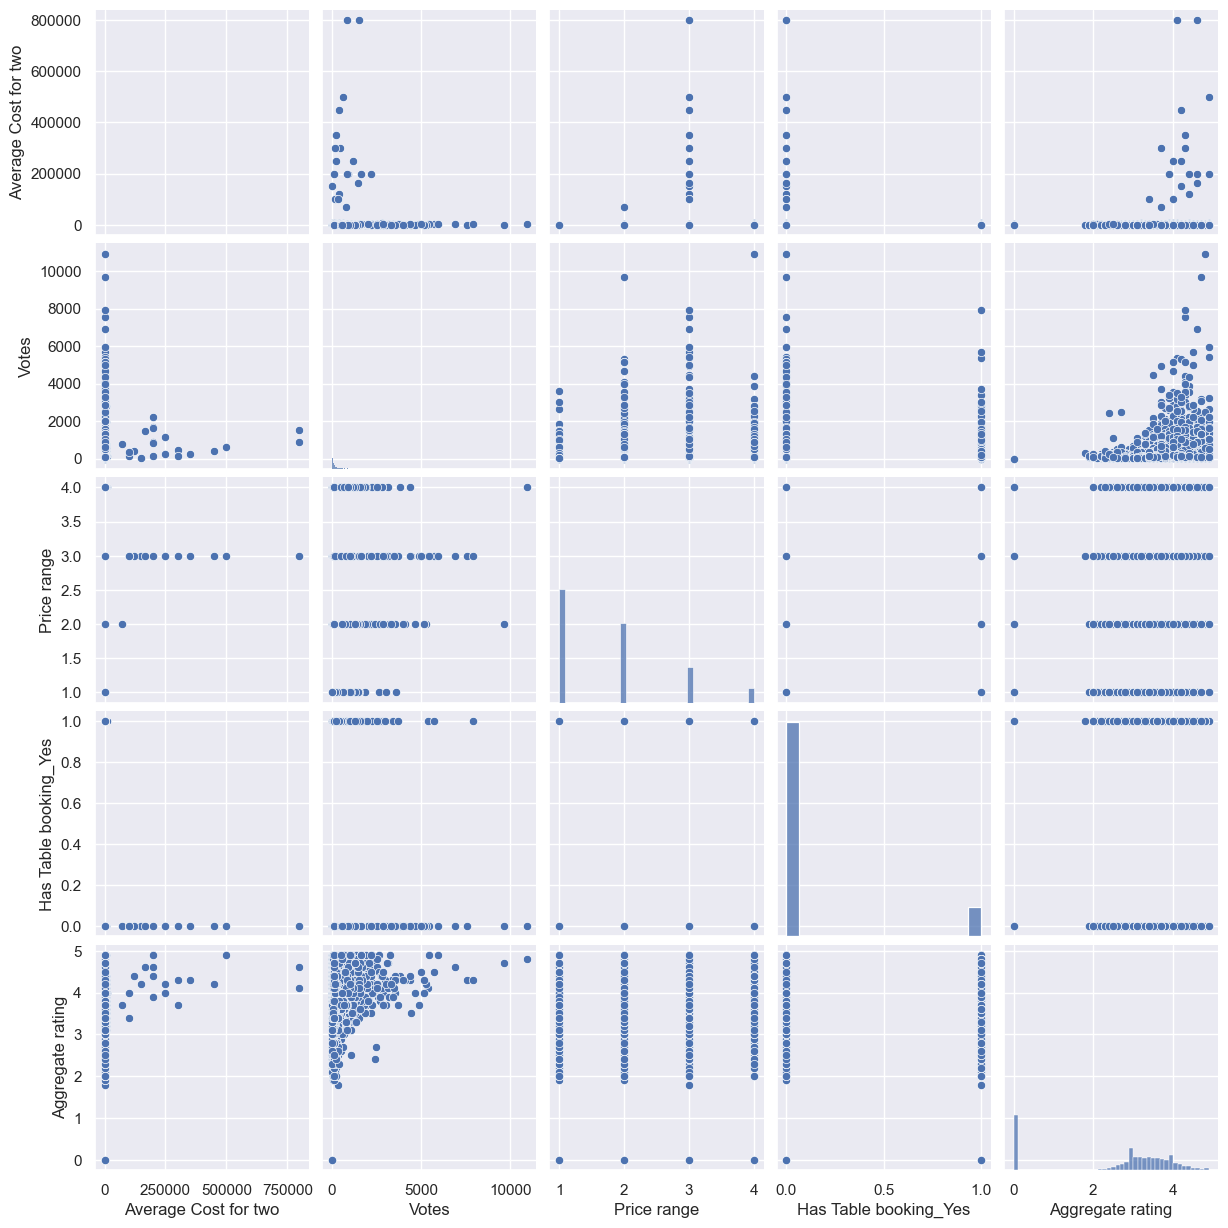

In [74]:
# Pair plot: Pairwise relationshipd between features and aggregate Rating

features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Aggregate rating']
sns.pairplot(df1[features])
plt.show()